# Cognitive Geometry Paper
## Free energy symmetry
Environment
* grid: 5 x 5 Manhattan
* beta: 1e7
* data files:
    * $\beta = 1\times 10^{7}$:  "data-5-5-man-liv-det-1.0-b-1e+07-Z.pickle"
    * $\beta = 0.1$:  "data-5-5-man-liv-det-1.0-b-0.1-Z.pickle"

In [5]:
from env.grid_room import GridRoom
from utility import display as di

In [6]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import networkx as nx
import numpy as np
import pickle
import os

from collections import Counter

In [9]:
root = "/home/ka16abr/writing/cognitive-geometry/"
os.chdir(root)
os.chdir("data/5-5-det")
# os.chdir("../../data/5-5-det")


## Near value optimal behaviour
$\beta = 1\times 10^{7}$

In [10]:
# extract data from pickle file
# /home/ka16abr/writing/cognitive-geometry/data/5-5-det/data-5-5-man-liv-det-1.0-b-1e+07-Z.pickle
filename = "data-5-5-man-liv-det-1.0-b-1e+07-Z.pickle"

# standard loop to load pickle file
with open(filename, 'rb') as infile:
    data_dict = pickle.load(infile)

env = data_dict['env'] # gridworld parameters
shape = data_dict['shape'] # shape of the grid world
theta = data_dict['theta'] # threshold for convergence
beta = data_dict['beta'] # trade-off parameter
state_dist = data_dict['state_dist'] # state distribution object used in the simulation

infos = data_dict['infos'] # decision information values
frees = data_dict['frees'] # free energy values
policies = data_dict['policies'] # corresponding free energy optimal policies

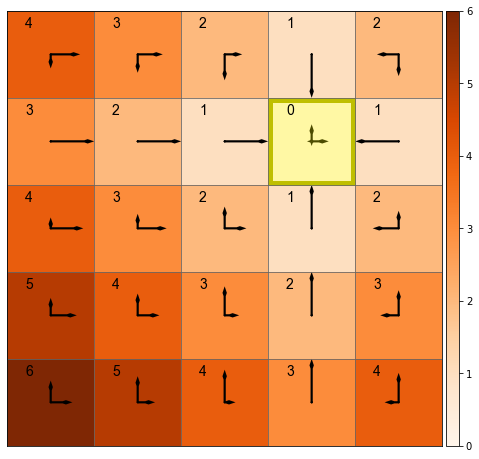

In [13]:
# sanity check for order of indices
g = 8
env.update_dynamics_for_goals([g])
di.plot_quiver_heatmap_var(env, frees[g], policies[g], label=True)

In [14]:
# plot adjacency matrix
D = np.zeros((env.nS, env.nS))
for i in range(env.nS):
    for j in range(env.nS):
        D[i, j] = frees[i][j]

D_sym = (D + D.T)/2
# calculate the asymmetric proportion
D_asymp = (D - D_sym)/D

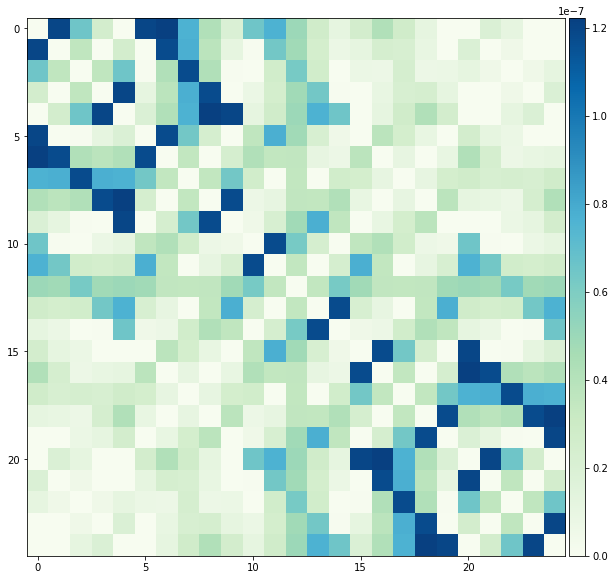

In [75]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(np.abs(D_asymp), cmap='GnBu', origin='upper')
# create colour bar that aligns height with axes
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
ax.figure.colorbar(im, cax=cax)

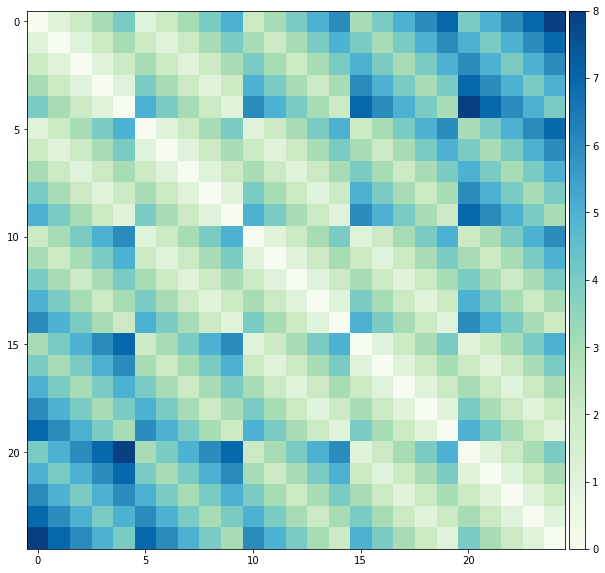

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(np.abs(D_sym), cmap='GnBu', origin='upper')
# create colour bar that aligns height with axes
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
ax.figure.colorbar(im, cax=cax)

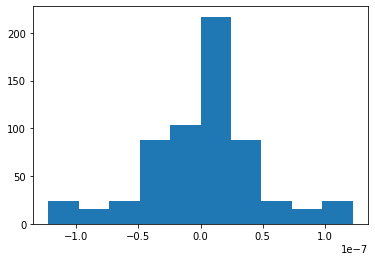

In [17]:
D_asymp.flatten()
plt.hist(D_asymp.flatten(), bins=10);

In [79]:
def plot_heatmap(ax, env, heatmap_var, clim=None, label=False):
    #im = ax.imshow(heatmap_var, cmap=plt.get_cmap('GnBu'))
    im = di.heatmap_imshow(env, heatmap_var, ax)
    ax.figure.colorbar(im)
    if clim is not None:
        im.set_clim(clim)

    # create colour bar that aligns height with axes
    # divider = make_axes_locatable(ax)
    # cax = divider.append_axes("right", size="3%", pad=0.05)
    # ax.figure.colorbar(im, cax=cax)

    ax.invert_yaxis()
    ax.grid(b=True, which='major', color='#666666', linestyle='-')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_ylim(env.shape[0], 0)
    ax.set_xlim(0, env.shape[1])

    # add label to each cell
    if label:
        di.add_label_to_plot(ax, heatmap_var.reshape(env.shape), 0.2, size=10)
    return ax

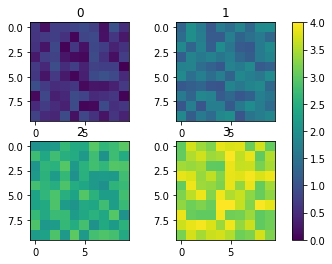

In [72]:
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig, axes = plt.subplots(nrows=2, ncols=2)
cmap=cm.get_cmap('viridis')
normalizer=Normalize(0,4)
im=cm.ScalarMappable(norm=normalizer)
for i,ax in enumerate(axes.flat):
    ax.
    ax.imshow(i+np.random.random((10,10)),cmap=cmap,norm=normalizer)
    ax.set_title(str(i))
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

In [77]:
def plot_heatmap_var_grid(env, vars, filename=None, label=False):
    clim = (0, np.max(vars))
    fig, axes = plt.subplots(env.shape[0], env.shape[1], sharex ='col', sharey='row', figsize=(15,15))
    fig.tight_layout()
    for i in range(env.shape[0]):
        for j in range (env.shape[1]):
            goal = i * shape[0]+j
            plot_heatmap(axes[i, j], env, vars[goal], clim=clim, label=label)
            
            # di.plot_quiver_heatmap_var(ax[i, j], env, data['frees'][goal], data['policies'][goal], clim=(clim,0), label=label)

    fig.colorbar(im, ax=axes.ravel().tolist())

    fig.subplots_adjust(top=0.95)
    # suptitle = r'$\mathcal{F}_{g}(s)$' + ' for' + r' $\beta={:3g}$'.format(beta)
    # fig.suptitle(r'$\mathcal{F}_{g}(s)$' + r' for $\beta={:3g}$ '.
    #              format(beta) + r'$g$ is given by the layout and $s$ by the grid in each plot.')
    if filename:
        fig.savefig(filename, bbox_inches='tight', pad_inches=0.1)



https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph

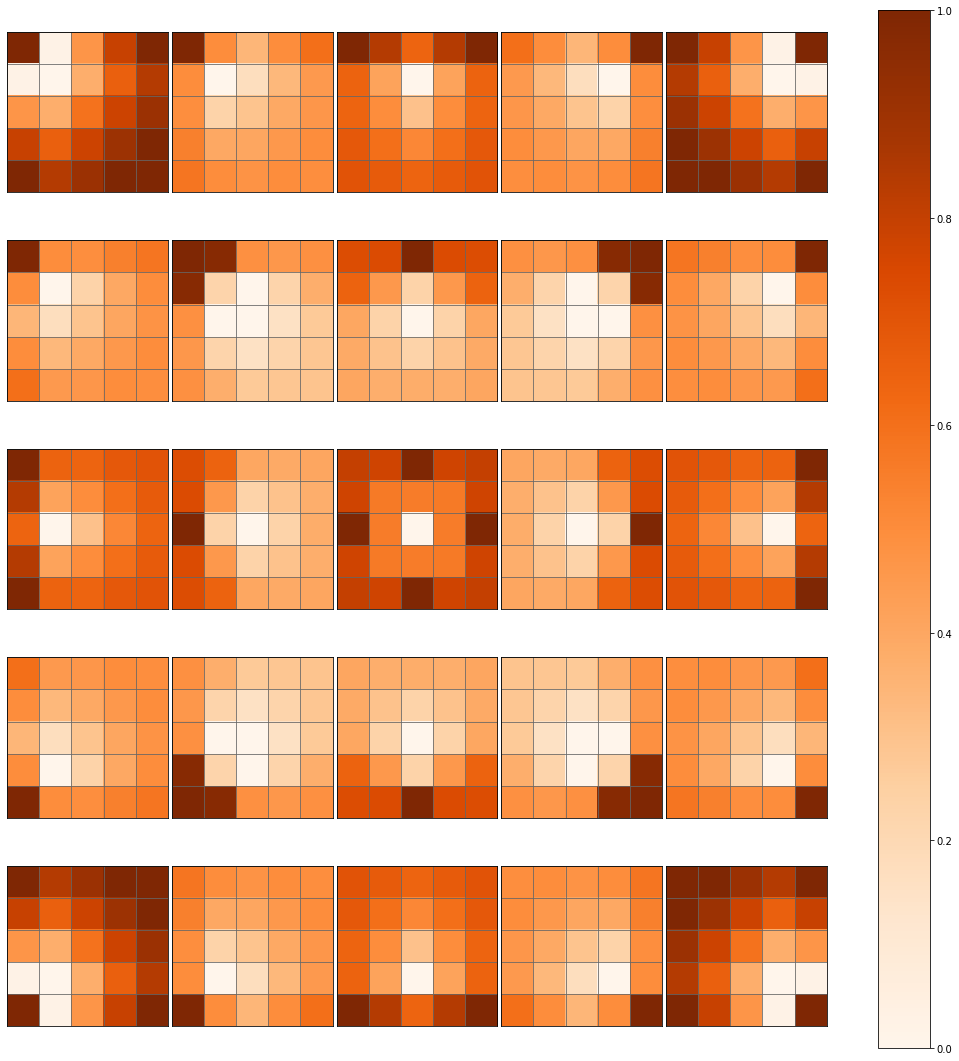

In [96]:

import numpy as np
import matplotlib as mpl
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm


fig, axes = plt.subplots(nrows=env.shape[0], ncols=env.shape[1], figsize=(15, 15))

fig.tight_layout()
fig.subplots_adjust(wspace=0.025, hspace=0.025)

cmap=cm.get_cmap('Oranges')


vars = D_asymp
clim = (0, np.max(vars))
norm = mpl.colors.Normalize(vmin=0, vmax=np.max(vars))
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])


for i, ax in enumerate(axes.flat):
    # ax.imshow(i+np.random.random((10,10)),cmap=cmap,norm=normalizer)
    goal = i
    di.heatmap_imshow(env, vars[i], ax)
    ax.invert_yaxis()
    ax.grid(b=True, which='major', color='#666666', linestyle='-')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    ax.set_ylim(env.shape[0], 0)
    ax.set_xlim(0, env.shape[1])
    
fig.colorbar(sm, ax=axes.ravel().tolist())




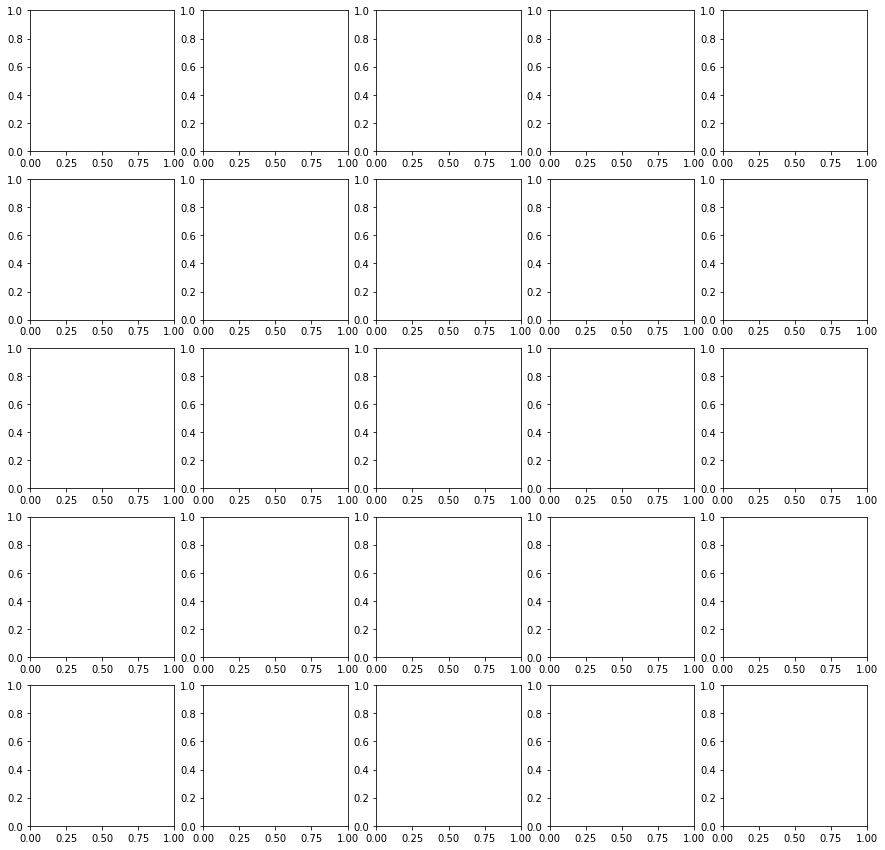

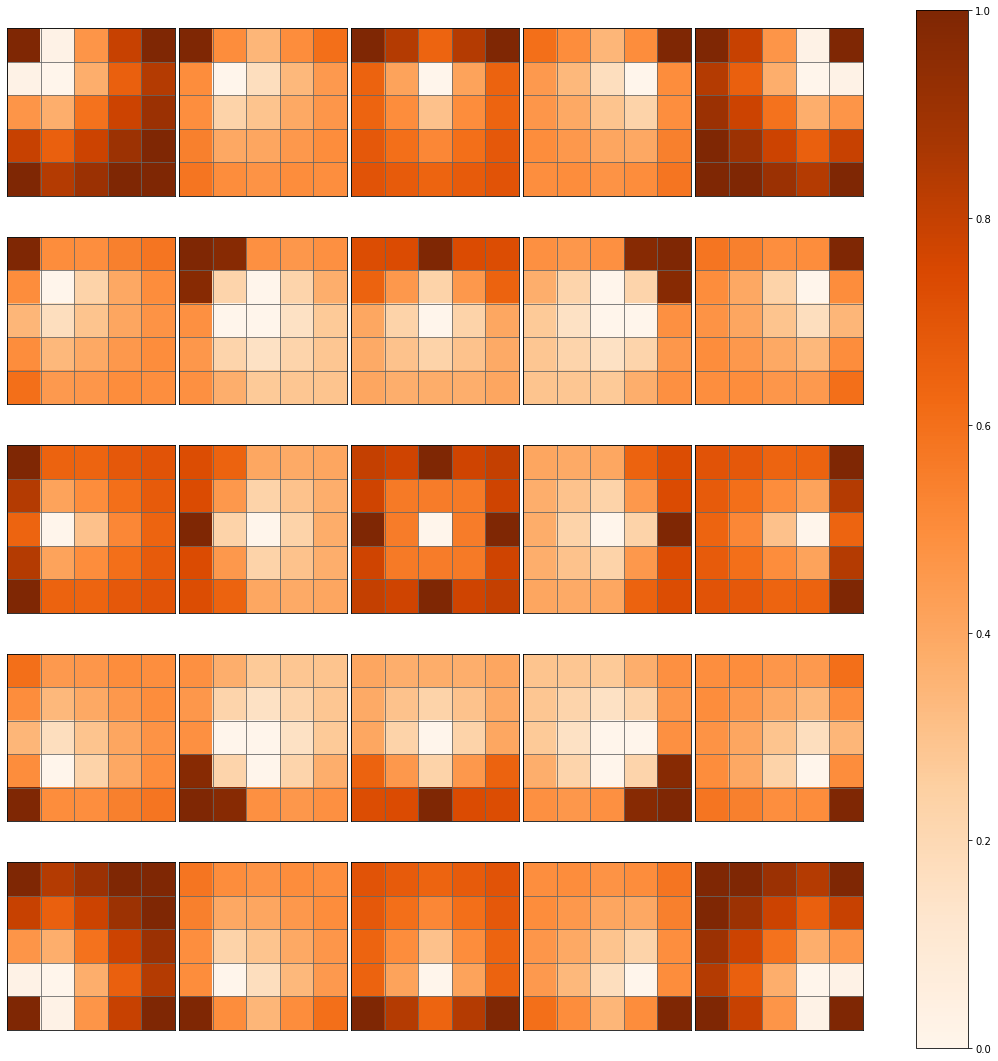

In [97]:
import numpy as np
import matplotlib as mpl
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm


fig, axes = plt.subplots(nrows=env.shape[0], ncols=env.shape[1], figsize=(15, 15))

aspect = 1.
n = env.shape[0] # number of rows
m = env.shape[1] # numberof columns
bottom = 0.1; left=0.05
top=1.-bottom; right = 1.-0.18
fisasp = (1-bottom-(1-top))/float( 1-left-(1-right) )
#widthspace, relative to subplot size
wspace=0  # set to zero for no spacing
hspace=wspace/float(aspect)
#fix the figure height
figheight= 15 # inch
figwidth = (m + (m-1)*wspace)/float((n+(n-1)*hspace)*aspect)*figheight*fisasp

fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(figwidth, figheight))
plt.subplots_adjust(top=top, bottom=bottom, left=left, right=right,
                    wspace=wspace, hspace=hspace)

fig.tight_layout()
fig.subplots_adjust(wspace=0.025, hspace=0.025)

cmap=cm.get_cmap('Oranges')


vars = D_asymp
clim = (0, np.max(vars))
norm = mpl.colors.Normalize(vmin=0, vmax=np.max(vars))
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])


for i, ax in enumerate(axes.flat):
    # ax.imshow(i+np.random.random((10,10)),cmap=cmap,norm=normalizer)
    goal = i
    di.heatmap_imshow(env, vars[i], ax)
    ax.invert_yaxis()
    ax.grid(b=True, which='major', color='#666666', linestyle='-')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    ax.set_ylim(env.shape[0], 0)
    ax.set_xlim(0, env.shape[1])
    
fig.colorbar(sm, ax=axes.ravel().tolist())

In [ ]:
print(D_asymp)

[[ 0.00000000e+00 -1.19691039e-07 -6.52772171e-08 -2.52035388e-08
   0.00000000e+00 -1.19691039e-07 -1.22309245e-07 -7.65635750e-08
  -4.17071503e-08 -1.95652626e-08 -6.52772171e-08 -7.65635750e-08
  -4.98956376e-08 -2.68891561e-08 -1.10805137e-08 -2.52035388e-08
  -4.17071503e-08 -2.68891561e-08 -1.14589889e-08  3.44557005e-10
   0.00000000e+00 -1.95652626e-08 -1.10805137e-08  3.44557005e-10
   0.00000000e+00]
 [ 1.19691010e-07  0.00000000e+00 -3.53551084e-08  0.00000000e+00
   2.52035375e-08  0.00000000e+00 -1.17960242e-07 -7.75490065e-08
  -3.73372248e-08 -1.11431708e-08 -8.77087478e-10 -6.39064403e-08
  -4.80800348e-08 -2.44707893e-08 -7.74513655e-09  1.11431706e-08
  -2.37985029e-08 -2.19933017e-08 -9.78681806e-09  0.00000000e+00
   1.95652617e-08  0.00000000e+00 -5.44487789e-09  0.00000000e+00
  -3.44557005e-10]
 [ 6.52772088e-08  3.53551059e-08  0.00000000e+00  3.53551059e-08
   6.52772088e-08  8.77087328e-10 -4.16971297e-08 -1.17701437e-07
  -4.16971297e-08  8.77087328e-10  0.0

## Near minimal information processing
$\beta = 0.1$

In [ ]:
# extract data from pickle file
# /home/ka16abr/writing/cognitive-geometry/data/5-5-det/data-5-5-man-liv-det-1.0-b-1e+07-Z.pickle
filename = "data-5-5-man-liv-det-1.0-b-0.1-Z.pickle"

# standard loop to load pickle file
with open(filename, 'rb') as infile:
    data_dict = pickle.load(infile)

env = data_dict['env'] # gridworld parameters
shape = data_dict['shape'] # shape of the grid world
theta = data_dict['theta'] # threshold for convergence
beta = data_dict['beta'] # trade-off parameter
state_dist = data_dict['state_dist'] # state distribution object used in the simulation

infos = data_dict['infos'] # decision information values
frees = data_dict['frees'] # free energy values
policies = data_dict['policies'] # corresponding free energy optimal policies

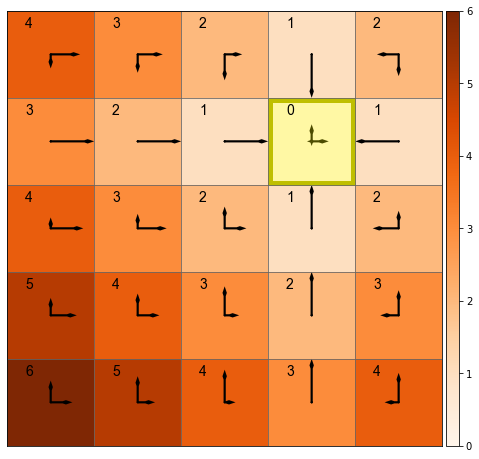

In [ ]:
# sanity check for order of indices
# g = 8
env.update_dynamics_for_goals([g])
di.plot_quiver_heatmap_var(env, frees[g], policies[g], label=True)

In [ ]:
# plot adjacency matrix
D = np.zeros((env.nS, env.nS))
for i in range(env.nS):
    for j in range(env.nS):
        D[i, j] = frees[i][j]

D_sym = (D+D.T)/2
# calculate the asymmetric proportion
D_asymp = (D - D_sym)/D

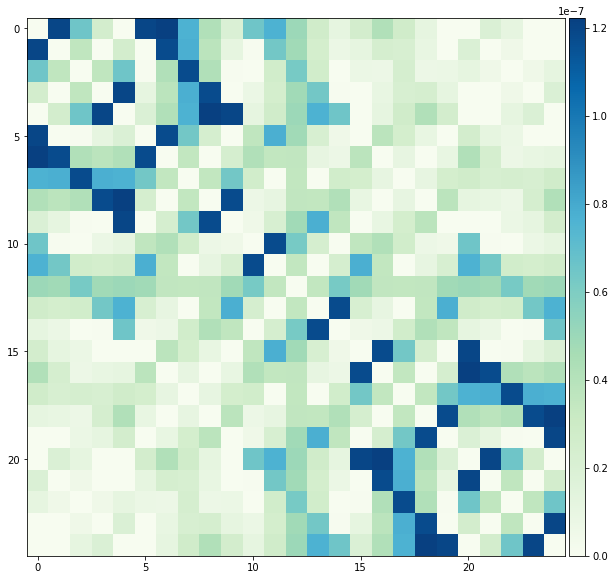

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(np.abs(D_asymp), cmap='GnBu', origin='upper')
# create colour bar that aligns height with axes
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
ax.figure.colorbar(im, cax=cax)